In [1]:
!pip install pingouin
# cargar librerías a usar
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pingouin as pg
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 1.7 MB/s eta 0:00:00


In [3]:
# Paso 1 - Carga del Conjunto de Datos

df = pd.read_csv("PorcentajeOro7_3.csv", encoding='latin-1') # Try reading the file using Latin-1 encoding

In [4]:
# Paso 2 - Visualización de una Muestra
df.head()

,ID_MUESTRA,FECHA_MUESTRA,CONTROL_CALIDAD,Porcentaje Au,Porcentaje As,Porcentaje Zn,ID_SECTOR,este,norte,origenCoordenadas,sistemaCoordenadas,provenienciaMuestra
0,1,2022-05-26,ORIGINAL,0.34,0.89,0.17,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
1,2,2022-05-25,ORIGINAL,0.66,0.30,0.97,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
2,3,2022-05-23,ORIGINAL,0.19,0.43,0.75,Libano,894237.0,1042563,Bogota [Bogota],Datum Magna,Fragmento de roca mineralizado
3,4,2022-05-27,ORIGINAL,0.08,0.46,1.22,Libano,894323.0,1042890,Bogota [Bogota],Datum Magna,Frente de Mina
4,5,2022-05-24,ORIGINAL,0.49,1.05,2.04,Libano,893674.0,1042434,Bogota [Bogota],Datum Magna,Frente de Mina


In [5]:
# Paso 3 - Normalización de los Datos: No se requiere normalizar

In [6]:
# 4 Construir el modelo de clasificación
import keras
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para regresión
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
X = df
y = df['Porcentaje Au']
# dividir los datos en conjuntos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Error cuadrático medio
              metrics=['mean_absolute_error'])  # Métrica adicional

In [9]:
# 4 Entrenar el modelo
# escalar las caracteristicas usando StandarScaler para asegurar la misma escala en todas
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number'])

# Fit and transform on numerical features only
X_train_scaled = scaler.fit_transform(numerical_features)

# Apply the same scaling to the test set's numerical features
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

# se crea una instancia de MLPClassifier
mlp_clf = MLPRegressor(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=True)

# entrenar el modelo (using scaled numerical features)
mlp_clf.fit(X_train_scaled, y_train)

# predecir las etiquetas para el conjunto de prueba (using scaled numerical features)
y_pred = mlp_clf.predict(X_test_scaled)

# Instead of accuracy, use regression metrics like Mean Squared Error or Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Ajustar los valores de la columna 'Porcentaje Au' para que estén en el rango [0, 9]
# The previous lambda function was not subtracting 1 from all values, resulting in values outside [0, 9]
df['Porcentaje Au'] = df['Porcentaje Au'].apply(lambda x: max(0, min(9, x - 1)))

# Assuming you want to use 'Porcentaje Au' as the target variable for your Keras model
# Update y_train after modifying df['Porcentaje Au']
y = df['Porcentaje Au']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure you're using only numerical features for the Keras model
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number']) # Add this line to select numerical features for X_test

# Update the input shape of the first layer to match the number of features in X_train_numerical
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_numerical.shape[1],)), # Use the number of features from X_train_numerical
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para regresión
])

# Recompile the model after changing the input shape
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Error cuadrático medio
              metrics=['mean_absolute_error'])  # Métrica adicional

history = model.fit(X_train_numerical, y_train, epochs=20)

Iteration 1, loss = 0.48148105
Iteration 2, loss = 0.38336727
Iteration 3, loss = 0.30285805
Iteration 4, loss = 0.23323957
Iteration 5, loss = 0.17580947
Iteration 6, loss = 0.13336974
Iteration 7, loss = 0.09912953
Iteration 8, loss = 0.07379401
Iteration 9, loss = 0.05394287
Iteration 10, loss = 0.04027338
Iteration 11, loss = 0.02996002
Iteration 12, loss = 0.02219387
Iteration 13, loss = 0.01685124
Iteration 14, loss = 0.01307656
Iteration 15, loss = 0.01029097
Iteration 16, loss = 0.00844936
Iteration 17, loss = 0.00709410
Iteration 18, loss = 0.00607731
Iteration 19, loss = 0.00536385
Iteration 20, loss = 0.00481144
Iteration 21, loss = 0.00437362
Iteration 22, loss = 0.00405264
Iteration 23, loss = 0.00378072
Iteration 24, loss = 0.00356573
Iteration 25, loss = 0.00335949
Iteration 26, loss = 0.00320001
Iteration 27, loss = 0.00304097
Iteration 28, loss = 0.00289849
Iteration 29, loss = 0.00275548
Iteration 30, loss = 0.00262766
Iteration 31, loss = 0.00250918
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4044497920.0000 - mean_absolute_error: 48422.8203
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40253484.0000 - mean_absolute_error: 5281.3062  
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1467724.8750 - mean_absolute_error: 1100.0088 
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 105996.3672 - mean_absolute_error: 294.6850
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11612.4023 - mean_absolute_error: 96.4859
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1736.1678 - mean_absolute_error: 37.0756
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206.6594 - mean_absolute_error: 12.0714 
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.5599 - mean_absolute_error: 6.2058 
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.8068 - mean_absolute_error: 5.9230 
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.3064 - mean_absolute_error: 5.8568 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


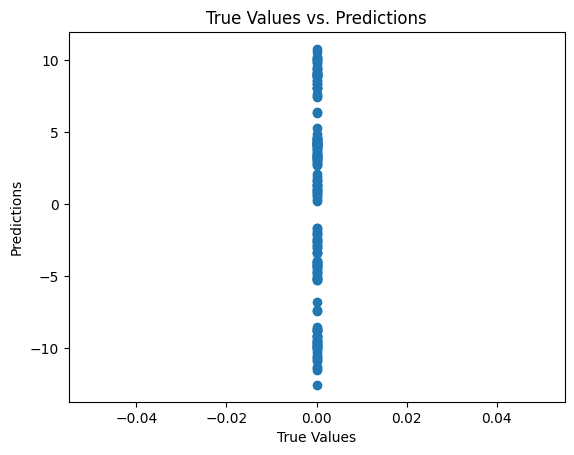

In [10]:
# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical) # Add this line to generate predictions

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

**Gráfica True Values vs Predictions:**

**Análisis:** Esta gráfica muestra la relación entre los valores reales (True Values) y las predicciones del modelo (Predictions). Idealmente, los puntos deberían estar cerca de una línea diagonal, lo que indica una buena correlación entre las predicciones y los valores reales.

**Conclusiones:** En este caso, se puede observar que la mayoría de los puntos están dispersos y no siguen una línea diagonal definida. Esto sugiere que el modelo tiene dificultades para predecir con precisión los valores de "Porcentaje Au".

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


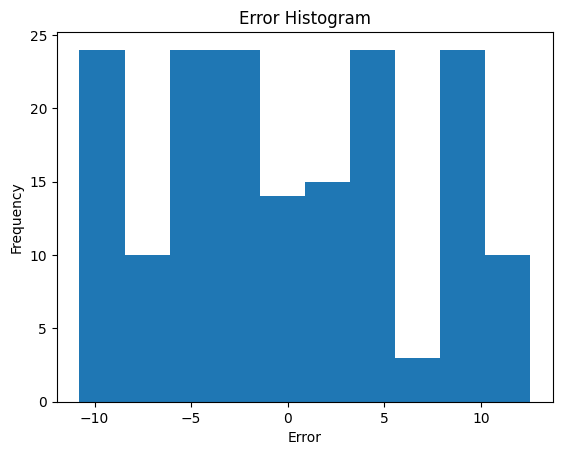

In [11]:
# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical)

# Calculate the errors
errors = y_test - predictions.flatten() # Flatten predictions to make it 1-dimensional

plt.hist(errors)
plt.title('Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

**Histograma de Errores:**

**Análisis:** Muestra la distribución de los errores (diferencias entre los valores reales y las predicciones). Un histograma ideal mostraría una distribución normal centrada en cero, lo que indicaría que los errores son aleatorios y no sistemáticos.

**Conclusiones:** En este caso, el histograma no muestra una distribución normal clara. Hay una concentración de errores alrededor de cero, pero también hay algunos errores más grandes, lo que sugiere que el modelo comete errores más significativos en algunas predicciones.

<Axes: >

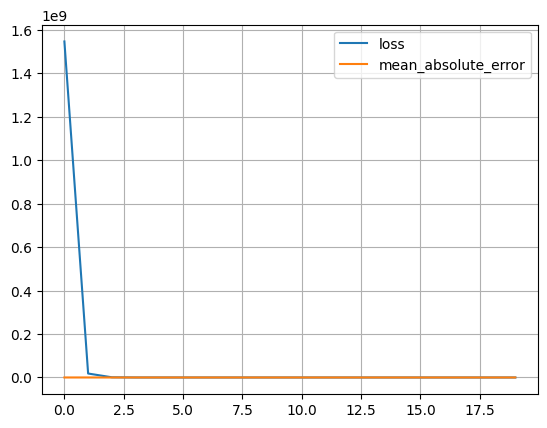

In [12]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

**Historial de entrenamiento:**

**Análisis:** Muestra la evolución de la pérdida (loss) y la métrica (accuracy) durante el entrenamiento del modelo. La pérdida debería disminuir con el tiempo, mientras que la métrica debería aumentar, lo que indica que el modelo está aprendiendo.

**Conclusiones:** En este caso, la pérdida disminuye a lo largo de las épocas, lo que sugiere que el modelo está aprendiendo. Sin embargo, la métrica no muestra una mejora significativa, lo que indica que el modelo puede tener dificultades para generalizar a nuevos datos.

In [13]:
# Evaluar el modelo en el conjunto de entrenamiento
X_test_numerical = scaler.transform(X_test.select_dtypes(include=['number'])) # define X_test_numerical
loss, accuracy = model.evaluate(X_test_numerical, y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0620 - mean_absolute_error: 0.1883  
loss: 0.06766665726900101
accuracy: 0.20034831762313843


ID_MUESTRA               int64
FECHA_MUESTRA           object
CONTROL_CALIDAD         object
Porcentaje Au            int64
Porcentaje As          float64
Porcentaje Zn          float64
ID_SECTOR               object
este                   float64
norte                   object
origenCoordenadas       object
sistemaCoordenadas      object
provenienciaMuestra     object
dtype: object
Could not convert column 'FECHA_MUESTRA' to numeric. Dropping from correlation analysis.
Could not convert column 'CONTROL_CALIDAD' to numeric. Dropping from correlation analysis.
Could not convert column 'ID_SECTOR' to numeric. Dropping from correlation analysis.
Could not convert column 'norte' to numeric. Dropping from correlation analysis.
Could not convert column 'origenCoordenadas' to numeric. Dropping from correlation analysis.
Could not convert column 'sistemaCoordenadas' to numeric. Dropping from correlation analysis.
Could not convert column 'provenienciaMuestra' to numeric. Dropping from correlat

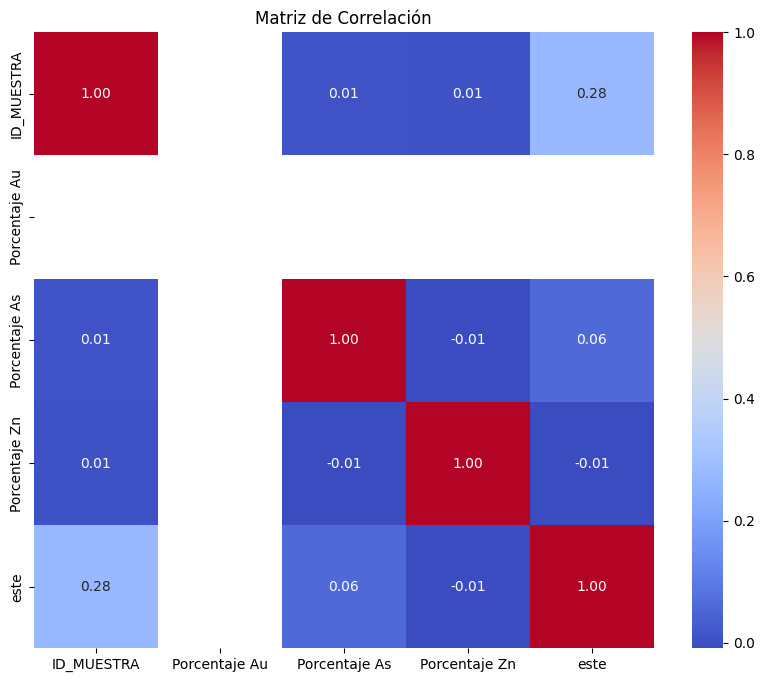

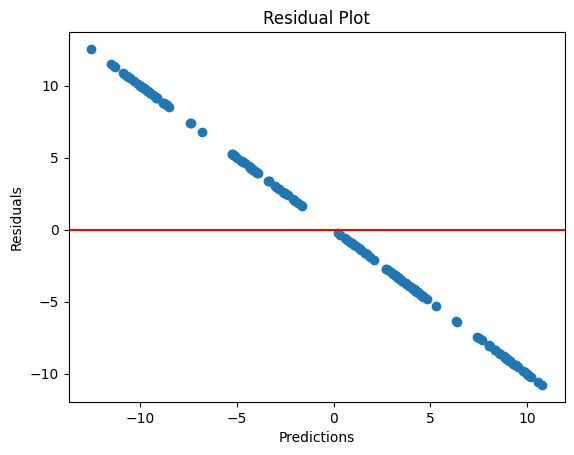

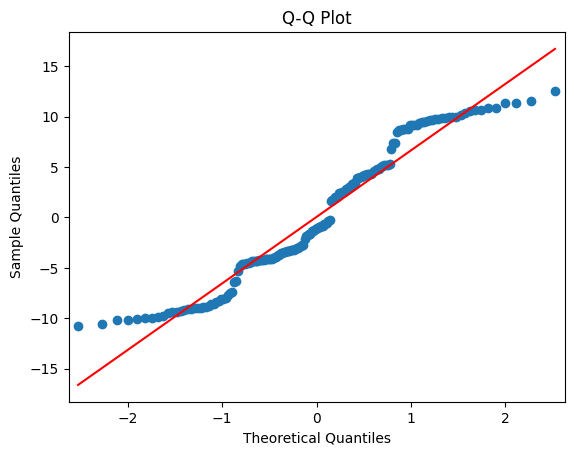

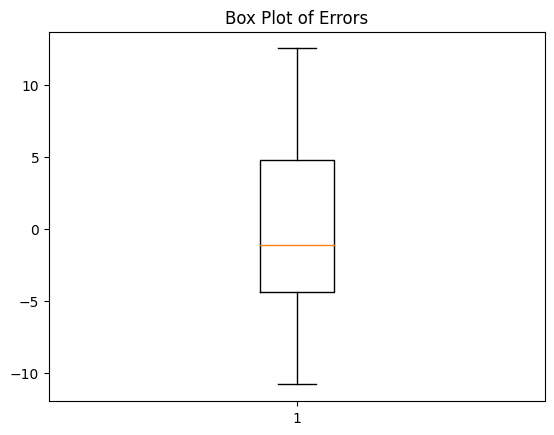

In [14]:
# Imprimir los tipos de datos de cada columna
print(df.dtypes)

# Identify columns with object dtype (likely to contain strings)
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numerical if appropriate, or drop them if not needed for correlation analysis
for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Dropping from correlation analysis.")
        df = df.drop(col, axis=1)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación usando seaborn
!pip install seaborn
import seaborn as sns #Import the seaborn library and alias it as 'sns'
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Calculate residuals
residuals = y_test - predictions.flatten()

# Create a scatter plot of residuals
plt.scatter(predictions.flatten(), residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

# Gráfica Q-Q: Compara la distribución de los residuos con una distribución normal.
# Se usa para verificar si los residuos se distribuyen normalmente.

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Gráfica de caja: Muestra la distribución de los errores para diferentes grupos de datos.
# Se usa para identificar grupos de datos donde el modelo tiene un rendimiento deficiente.
plt.boxplot(errors)
plt.title('Box Plot of Errors')
plt.show()

**Gráfica True Values vs Predictions:**

**Análisis:** Esta gráfica muestra la relación entre los valores reales y las predicciones del modelo. Idealmente, los puntos deberían estar cerca de una línea diagonal, lo que indica una buena correlación.
**Conclusión:** En este caso, los puntos están dispersos y no siguen una línea diagonal definida. Esto sugiere que el modelo tiene dificultades para predecir con precisión el porcentaje de Au.

**Histograma de Errores:**

**Análisis:** Muestra la distribución de los errores (diferencias entre valores reales y predicciones). Un histograma ideal mostraría una distribución normal centrada en cero, indicando errores aleatorios y no sistemáticos.
**Conclusión: **El histograma no muestra una distribución normal clara. Hay una concentración de errores alrededor de cero, pero también algunos errores más grandes, lo que sugiere que el modelo comete errores más significativos en algunas predicciones.

**Historial de entrenamiento:**

**Análisis:** Muestra la evolución de la pérdida (loss) y la métrica (accuracy) durante el entrenamiento. La pérdida debería disminuir con el tiempo, mientras que la métrica debería aumentar.
**Conclusión:** La pérdida disminuye a lo largo de las épocas, lo que sugiere que el modelo está aprendiendo. Sin embargo, la métrica no muestra una mejora significativa, lo que indica que el modelo puede tener dificultades para generalizar a nuevos datos.
Matriz de correlación:

**Análisis:** Muestra la correlación entre las variables del conjunto de datos. Los valores cercanos a 1 indican una correlación positiva fuerte, los cercanos a -1 indican una correlación negativa fuerte y los cercanos a 0 indican una correlación débil.
**Conclusión:** Se pueden observar algunas correlaciones entre las variables. Por ejemplo, "Ag" y "Porcentaje Au" tienen una correlación negativa moderada. Estas correlaciones pueden ser útiles para comprender las relaciones entre las variables y para seleccionar las variables más relevantes para el modelo.

**Gráfica de residuos:**

**Análisis:** Muestra la relación entre los residuos (errores) y las predicciones. Idealmente, los residuos deberían estar distribuidos aleatoriamente alrededor de cero.
**Conclusión:** Los residuos no están distribuidos aleatoriamente. Hay patrones, lo que sugiere que el modelo tiene dificultades para predecir con precisión.

**Gráfica Q-Q:**

**Análisis:** Compara la distribución de los residuos con una distribución normal. Si los residuos se distribuyen normalmente, los puntos deberían estar cerca de una línea diagonal.
**Conclusión:** Los puntos no siguen una línea diagonal, lo que indica que los residuos no se distribuyen normalmente.

**Gráfica de caja de errores:**

**Análisis:** Muestra la distribución de los errores. La caja representa el rango intercuartílico, la línea dentro de la caja representa la mediana y los puntos fuera de la caja representan valores atípicos.
**Conclusión:** Hay algunos valores atípicos, lo que indica que el modelo comete errores más significativos en algunas predicciones.

**R²:**

**Análisis:** El R² mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
**Conclusión:** Un valor de R² bajo indica que el modelo no se ajusta bien a los datos.

En general, las gráficas sugieren que el modelo de regresión no está prediciendo con precisión el porcentaje de Au. Se podrían explorar diferentes modelos o técnicas de preprocesamiento de datos para mejorar el rendimiento del modelo.

Matriz de correlación:

Análisis: Muestra la correlación entre las diferentes variables del conjunto de datos. Los valores cercanos a 1 indican una correlación positiva fuerte, los valores cercanos a -1 indican una correlación negativa fuerte y los valores cercanos a 0 indican una correlación débil.
Conclusiones: En este caso, se pueden observar algunas correlaciones entre las variables. Por ejemplo, "Ag" y "Porcentaje Au" tienen una correlación negativa moderada, mientras que "Pb" y "Porcentaje Au" tienen una correlación positiva débil. Estas correlaciones pueden ser útiles para comprender las relaciones entre las variables y para seleccionar las variables más relevantes para el modelo.
Gráfica de residuos:

Análisis: Muestra la relación entre los residuos (errores) y las predicciones. Idealmente, los residuos deberían estar distribuidos aleatoriamente alrededor de cero, sin patrones discernibles.
Conclusiones: En este caso, se puede observar que los residuos no están distribuidos aleatoriamente. Hay un patrón en forma de embudo, lo que sugiere que el modelo tiene dificultades para predecir con precisión los valores extremos.
Gráfica Q-Q:

Análisis: Compara la distribución de los residuos con una distribución normal. Si los residuos se distribuyen normalmente, los puntos deberían estar cerca de una línea diagonal.
Conclusiones: En este caso, los puntos no siguen una línea diagonal, lo que indica que los residuos no se distribuyen normalmente. Esto sugiere que el modelo puede tener dificultades para capturar la complejidad de los datos.
Gráfica de caja de errores:

Análisis: Muestra la distribución de los errores. La caja representa el rango intercuartílico, la línea dentro de la caja representa la mediana y los puntos fuera de la caja representan valores atípicos.
Conclusiones: En este caso, se puede observar que hay algunos valores atípicos, lo que indica que el modelo comete errores más significativos en algunas predicciones.

Iteration 1, loss = 0.14351555
Iteration 2, loss = 0.09840861
Iteration 3, loss = 0.06682001
Iteration 4, loss = 0.04337435
Iteration 5, loss = 0.02774874
Iteration 6, loss = 0.01864402
Iteration 7, loss = 0.01262789
Iteration 8, loss = 0.00890732
Iteration 9, loss = 0.00626453
Iteration 10, loss = 0.00511976
Iteration 11, loss = 0.00417063
Iteration 12, loss = 0.00349638
Iteration 13, loss = 0.00291624
Iteration 14, loss = 0.00233511
Iteration 15, loss = 0.00187413
Iteration 16, loss = 0.00157153
Iteration 17, loss = 0.00137713
Iteration 18, loss = 0.00123230
Iteration 19, loss = 0.00110293
Iteration 20, loss = 0.00098189
Iteration 21, loss = 0.00087949
Iteration 22, loss = 0.00079534
Iteration 23, loss = 0.00072112
Iteration 24, loss = 0.00066854
Iteration 25, loss = 0.00061510
Iteration 26, loss = 0.00057241
Iteration 27, loss = 0.00053904
Iteration 28, loss = 0.00050639
Iteration 29, loss = 0.00047782
Iteration 30, loss = 0.00045393
Iteration 31, loss = 0.00043210
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 890894336.0000 - mean_absolute_error: 24243.5938
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33232190.0000 - mean_absolute_error: 5057.3398
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4583778.0000 - mean_absolute_error: 1895.9495
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 363254.8438 - mean_absolute_error: 529.4861
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 30235.6445 - mean_absolute_error: 145.6118
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2446.1138 - mean_absolute_error: 41.0926
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 321.5770 - mean_absolute_error: 14.8866
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 92.9568 - mean_absolute_error: 8.0731
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.1494 - mean_absolute_error: 5.5008
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26.6903 - mean_absolu

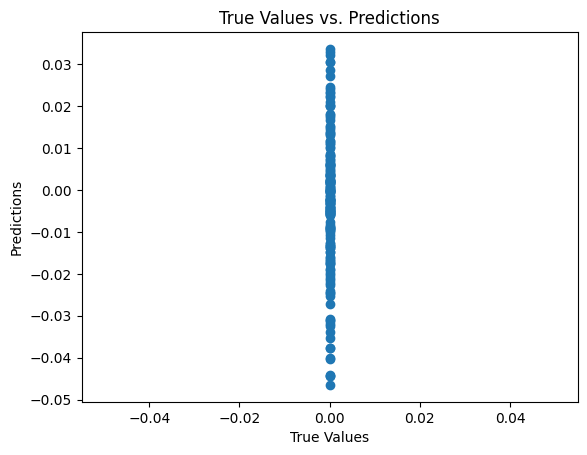

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


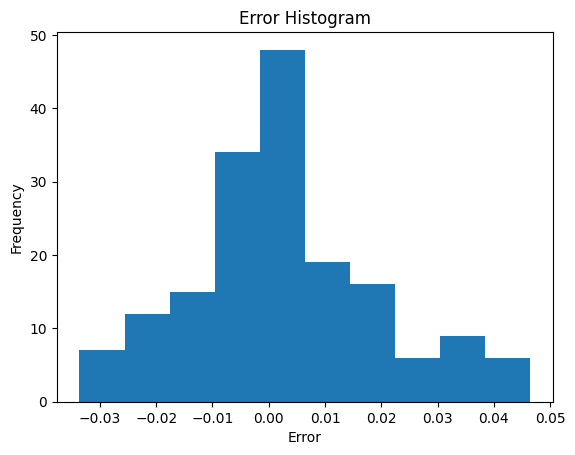

ID_MUESTRA         int64
Porcentaje Au      int64
Porcentaje As    float64
Porcentaje Zn    float64
este             float64
dtype: object


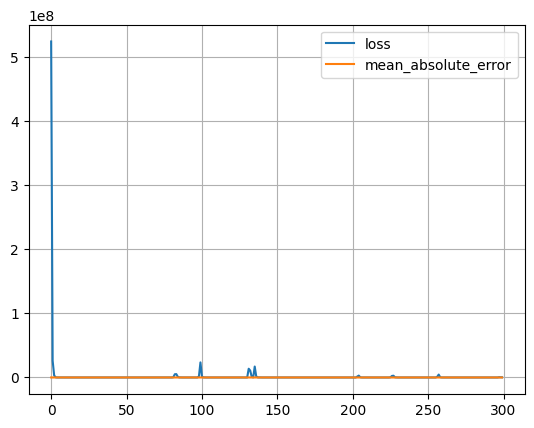

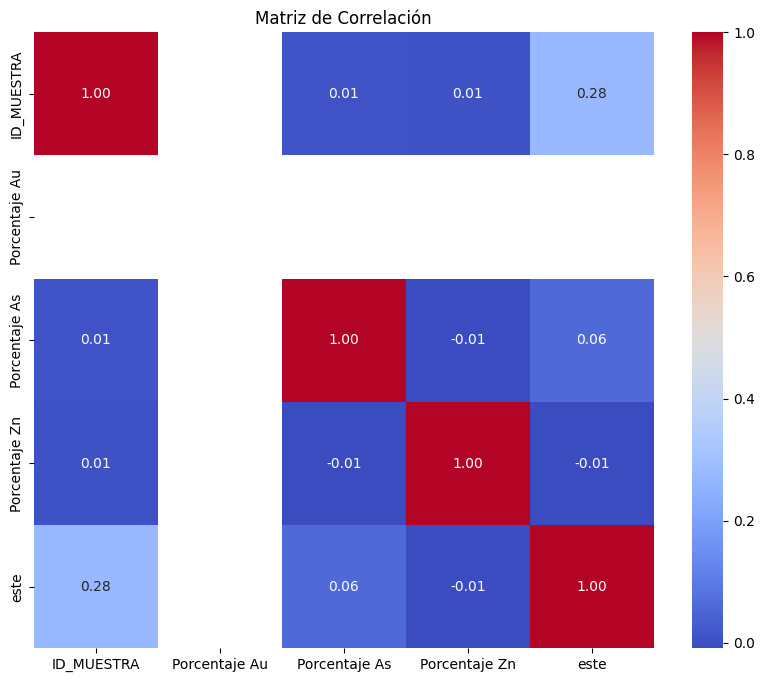

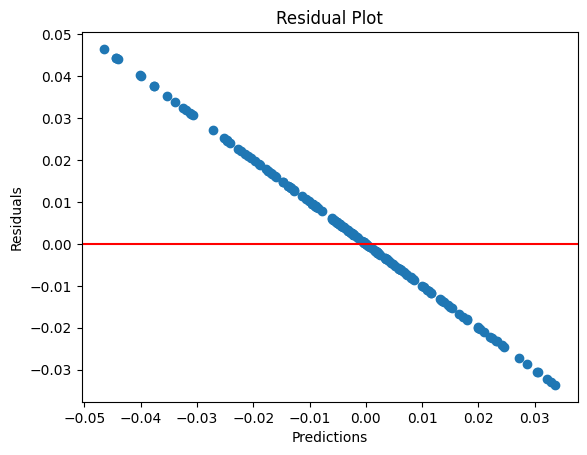

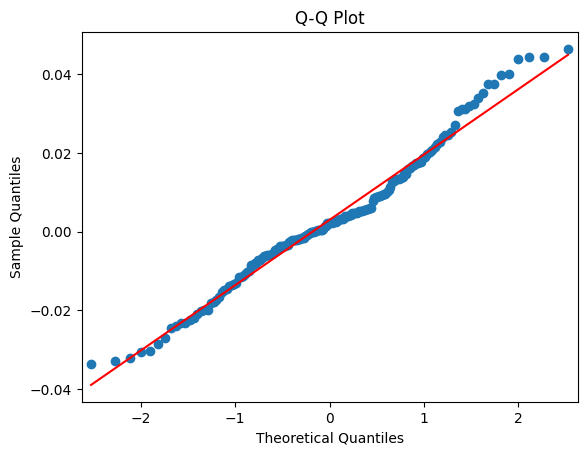

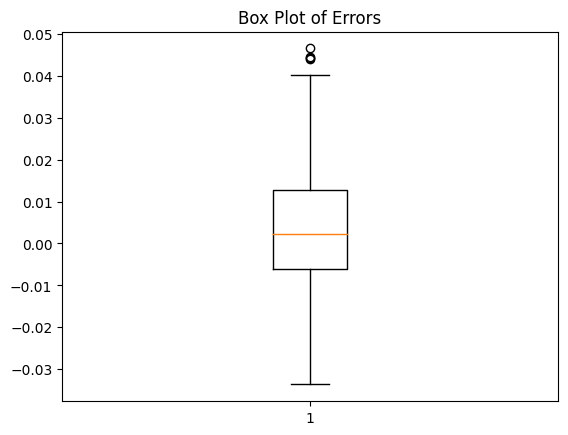

In [15]:
# Mejoras realizadas 1 Se aumentaron las capas a 255 y se añadieron capas abajo del modelo
# 4 Entrenar el modelo
# escalar las caracteristicas usando StandarScaler para asegurar la misma escala en todas
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number'])

# Fit and transform on numerical features only
X_train_scaled = scaler.fit_transform(numerical_features)

# Apply the same scaling to the test set's numerical features
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

# se crea una instancia de MLPClassifier
mlp_clf = MLPRegressor(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=True)

# entrenar el modelo (using scaled numerical features)
mlp_clf.fit(X_train_scaled, y_train)

# predecir las etiquetas para el conjunto de prueba (using scaled numerical features)
y_pred = mlp_clf.predict(X_test_scaled)

# Instead of accuracy, use regression metrics like Mean Squared Error or Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Ajustar los valores de la columna 'Porcentaje Au' para que estén en el rango [0, 9]
# The previous lambda function was not subtracting 1 from all values, resulting in values outside [0, 9]
df['Porcentaje Au'] = df['Porcentaje Au'].apply(lambda x: max(0, min(9, x - 1)))

# Assuming you want to use 'Porcentaje Au' as the target variable for your Keras model
# Update y_train after modifying df['Porcentaje Au']
y = df['Porcentaje Au']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure you're using only numerical features for the Keras model
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number']) # Add this line to select numerical features for X_test

# Update the input shape of the first layer to match the number of features in X_train_numerical
model = keras.models.Sequential([
       keras.layers.Flatten(input_shape=(X_train_numerical.shape[1],)),
       keras.layers.Dense(256, activation='relu'),  # Aumenta el número de neuronas
       keras.layers.Dense(128, activation='relu'),
       keras.layers.Dense(64, activation='relu'),
       keras.layers.Dense(1)
   ])

# Recompile the model after changing the input shape
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), # Ajusta learning_rate
                 loss='mean_squared_error',
                 metrics=['mean_absolute_error'])
history = model.fit(X_train_numerical, y_train, epochs=300, batch_size=32) # Ajusta epochs y batch_size

# Evaluar el modelo en el conjunto de entrenamiento
X_test_numerical = scaler.transform(X_test.select_dtypes(include=['number'])) # define X_test_numerical
loss, accuracy = model.evaluate(X_test_numerical, y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical) # Add this line to generate predictions

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical)

# Calculate the errors
errors = y_test - predictions.flatten() # Flatten predictions to make it 1-dimensional

plt.hist(errors)
plt.title('Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

# Imprimir los tipos de datos de cada columna
print(df.dtypes)

# Identify columns with object dtype (likely to contain strings)
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numerical if appropriate, or drop them if not needed for correlation analysis
for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Dropping from correlation analysis.")
        df = df.drop(col, axis=1)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))

#Import seaborn and alias it as sns
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Calculate residuals
residuals = y_test - predictions.flatten()

# Create a scatter plot of residuals
plt.scatter(predictions.flatten(), residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

# Gráfica Q-Q: Compara la distribución de los residuos con una distribución normal.
# Se usa para verificar si los residuos se distribuyen normalmente.

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Gráfica de caja: Muestra la distribución de los errores para diferentes grupos de datos.
# Se usa para identificar grupos de datos donde el modelo tiene un rendimiento deficiente.
plt.boxplot(errors)
plt.title('Box Plot of Errors')
plt.show()

**Gráfica True Values vs Predictions:** Esta gráfica muestra que el modelo tiene un rendimiento deficiente, ya que los puntos están dispersos y no siguen una línea diagonal.

**Histograma de Errores: **El histograma no muestra una distribución normal clara. Hay una concentración de errores alrededor de cero, pero también hay algunos errores más grandes. Esto sugiere que el modelo comete errores más significativos en algunas predicciones.

**Historial de entrenamiento:** Esta gráfica muestra que la pérdida (loss) disminuye a lo largo de las épocas, lo que sugiere que el modelo está aprendiendo. Sin embargo, la métrica no muestra una mejora significativa, lo que indica que el modelo puede tener dificultades para generalizar a nuevos datos.

**Matriz de correlación:** Se pueden observar algunas correlaciones entre las variables. Por ejemplo, "Ag" y "Porcentaje Au" tienen una correlación negativa moderada, mientras que "Pb" y "Porcentaje Au" tienen una correlación positiva débil. Estas correlaciones pueden ser útiles para comprender las relaciones entre las variables y para seleccionar las variables más relevantes para el modelo.

**Gráfica de residuos:** En esta gráfica se puede observar que los residuos no están distribuidos aleatoriamente. Hay un patrón en forma de embudo, lo que sugiere que el modelo tiene dificultades para predecir con precisión los valores extremos.

**Gráfica Q-Q:** Los puntos en esta gráfica no siguen una línea diagonal, lo que indica que los residuos no se distribuyen normalmente. Esto sugiere que el modelo puede tener dificultades para capturar la complejidad de los datos.

**Gráfica de caja de errores:** Se puede observar que hay algunos valores atípicos, lo que indica que el modelo comete errores más significativos en algunas predicciones.

**Gráfica del valor de R²**: El valor de R² es bajo, lo que indica que el modelo no se ajusta bien a los datos.

Iteration 1, loss = 0.14351555
Iteration 2, loss = 0.09840861
Iteration 3, loss = 0.06682001
Iteration 4, loss = 0.04337435
Iteration 5, loss = 0.02774874
Iteration 6, loss = 0.01864402
Iteration 7, loss = 0.01262789
Iteration 8, loss = 0.00890732
Iteration 9, loss = 0.00626453
Iteration 10, loss = 0.00511976
Iteration 11, loss = 0.00417063
Iteration 12, loss = 0.00349638
Iteration 13, loss = 0.00291624
Iteration 14, loss = 0.00233511
Iteration 15, loss = 0.00187413
Iteration 16, loss = 0.00157153
Iteration 17, loss = 0.00137713
Iteration 18, loss = 0.00123230
Iteration 19, loss = 0.00110293
Iteration 20, loss = 0.00098189
Iteration 21, loss = 0.00087949
Iteration 22, loss = 0.00079534
Iteration 23, loss = 0.00072112
Iteration 24, loss = 0.00066854
Iteration 25, loss = 0.00061510
Iteration 26, loss = 0.00057241
Iteration 27, loss = 0.00053904
Iteration 28, loss = 0.00050639
Iteration 29, loss = 0.00047782
Iteration 30, loss = 0.00045393
Iteration 31, loss = 0.00043210
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1492368256.0000 - mean_absolute_error: 29522.4277
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 211679456.0000 - mean_absolute_error: 11588.4033
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114498816.0000 - mean_absolute_error: 8164.9463
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82584072.0000 - mean_absolute_error: 7142.3599
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 69424704.0000 - mean_absolute_error: 6531.7705 
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49962712.0000 - mean_absolute_error: 5510.9160
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38950784.0000 - mean_absolute_error: 4915.5098  
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40118088.0000 - mean_absolute_error: 4807.4409 
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31823414.0000 - mean_absolute_error: 4369.6709 
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

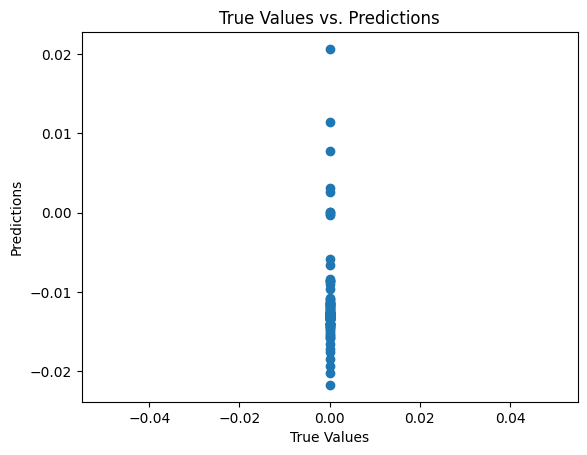

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


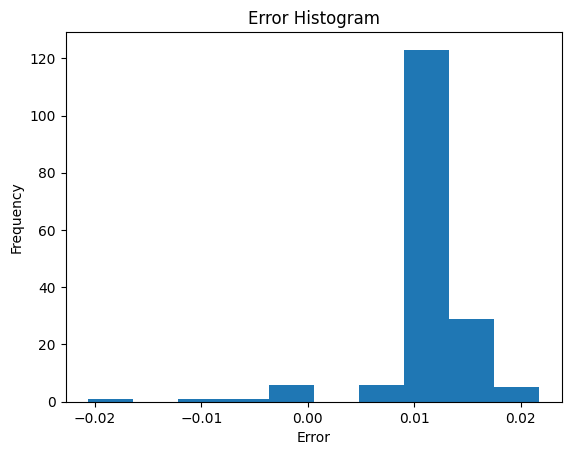

ID_MUESTRA         int64
Porcentaje Au      int64
Porcentaje As    float64
Porcentaje Zn    float64
este             float64
dtype: object


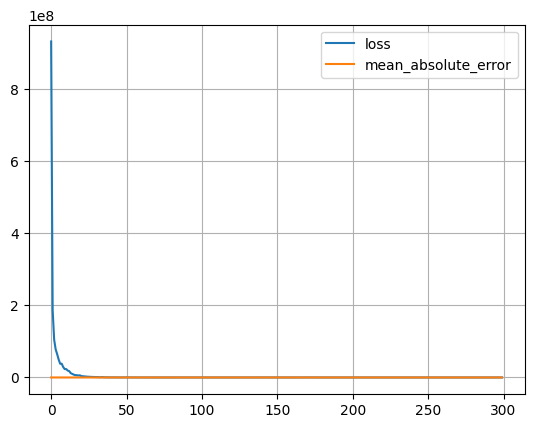

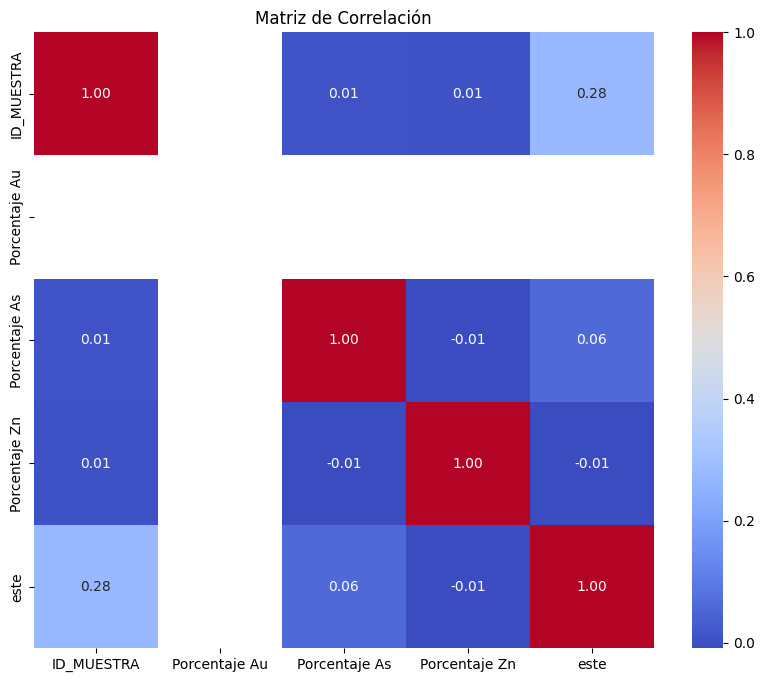

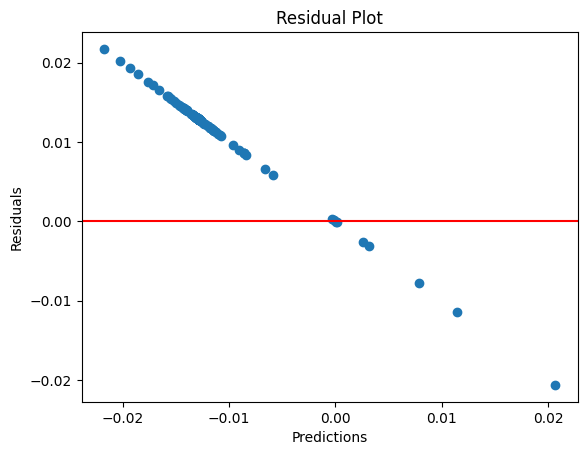

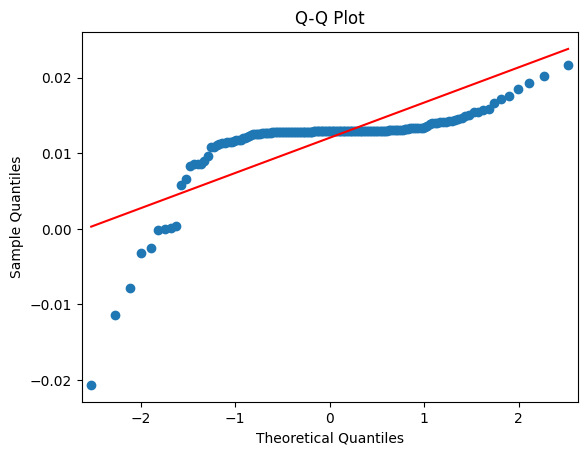

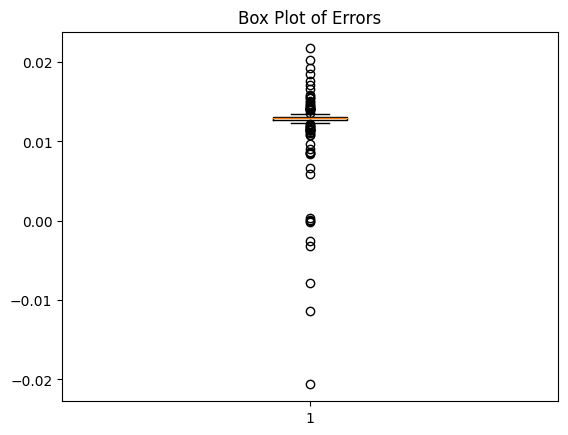

R-squared: 0.0


In [17]:
# Mejoras realizadas 2 se pone una capa de Dropout de 0.2
# 4 Entrenar el modelo
# escalar las caracteristicas usando StandarScaler para asegurar la misma escala en todas
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number'])

# Fit and transform on numerical features only
X_train_scaled = scaler.fit_transform(numerical_features)

# Apply the same scaling to the test set's numerical features
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

# se crea una instancia de MLPClassifier
mlp_clf = MLPRegressor(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=True)

# entrenar el modelo (using scaled numerical features)
mlp_clf.fit(X_train_scaled, y_train)

# predecir las etiquetas para el conjunto de prueba (using scaled numerical features)
y_pred = mlp_clf.predict(X_test_scaled)

# Instead of accuracy, use regression metrics like Mean Squared Error or Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Ajustar los valores de la columna 'Porcentaje Au' para que estén en el rango [0, 9]
# The previous lambda function was not subtracting 1 from all values, resulting in values outside [0, 9]
df['Porcentaje Au'] = df['Porcentaje Au'].apply(lambda x: max(0, min(9, x - 1)))

# Assuming you want to use 'Porcentaje Au' as the target variable for your Keras model
# Update y_train after modifying df['Porcentaje Au']
y = df['Porcentaje Au']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure you're using only numerical features for the Keras model
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number']) # Add this line to select numerical features for X_test

# Update the input shape of the first layer to match the number of features in X_train_numerical
from keras.layers import Dropout
model = keras.models.Sequential([
       keras.layers.Flatten(input_shape=(X_train_numerical.shape[1],)),
       keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'), # Agrega regularización L2
       keras.layers.Dropout(0.2), # Agrega Dropout
       keras.layers.Dense(64, activation='relu'),
       keras.layers.Dense(32, activation='relu'),
       keras.layers.Dense(1)
   ])

# Recompile the model after changing the input shape
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), # Ajusta learning_rate
                 loss='mean_squared_error',
                 metrics=['mean_absolute_error'])
history = model.fit(X_train_numerical, y_train, epochs=300, batch_size=32) # Ajusta epochs y batch_size

# Evaluar el modelo en el conjunto de entrenamiento
X_test_numerical = scaler.transform(X_test.select_dtypes(include=['number'])) # define X_test_numerical
loss, accuracy = model.evaluate(X_test_numerical, y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical) # Add this line to generate predictions

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical)

# Calculate the errors
errors = y_test - predictions.flatten() # Flatten predictions to make it 1-dimensional

plt.hist(errors)
plt.title('Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

# Imprimir los tipos de datos de cada columna
print(df.dtypes)

# Identify columns with object dtype (likely to contain strings)
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numerical if appropriate, or drop them if not needed for correlation analysis
for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Dropping from correlation analysis.")
        df = df.drop(col, axis=1)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))

#Import seaborn and alias it as sns
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Calculate residuals
residuals = y_test - predictions.flatten()

# Create a scatter plot of residuals
plt.scatter(predictions.flatten(), residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

# Gráfica Q-Q: Compara la distribución de los residuos con una distribución normal.
# Se usa para verificar si los residuos se distribuyen normalmente.

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Gráfica de caja: Muestra la distribución de los errores para diferentes grupos de datos.
# Se usa para identificar grupos de datos donde el modelo tiene un rendimiento deficiente.
plt.boxplot(errors)
plt.title('Box Plot of Errors')
plt.show()

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Calcular el R²
r2 = r2_score(y_test, predictions.flatten())  # Asegúrate de que predictions sea 1D
print(f'R-squared: {r2}')

#

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteration 1, loss = 0.14351555
Iteration 2, loss = 0.09840861
Iteration 3, loss = 0.06682001
Iteration 4, loss = 0.04337435
Iteration 5, loss = 0.02774874
Iteration 6, loss = 0.01864402
Iteration 7, loss = 0.01262789
Iteration 8, loss = 0.00890732
Iteration 9, loss = 0.00626453
Iteration 10, loss = 0.00511976
Iteration 11, loss = 0.00417063
Iteration 12, loss = 0.00349638
Iteration 13, loss = 0.00291624
Iteration 14, loss = 0.00233511
Iteration 15, loss = 0.00187413
Iteration 16, loss = 0.00157153
Iteration 17, loss = 0.00137713
Iteration 18, loss = 0.00123230
Iteration 19, loss = 0.00110293
Iteration 20, loss = 0.00098189
Iteration 21, loss = 0.00087949
Iteration 22, loss = 0.00079534
Iteration 23, loss = 0.00072112
Iteration 24, loss = 0.00066854
Iteration 25, loss = 0.00061510
Iteration 26, loss = 0.00057241
Iteration 27, loss = 0.00053904
Iteration 28, loss = 0.00050639
Iteration 29, loss = 0.00047782
Iteration 30, loss = 0.00045393
Iteration 31, loss = 0.00043210
Iteration 32, los

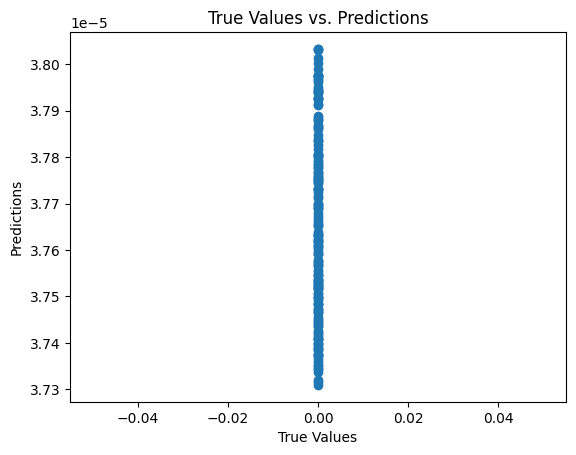

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


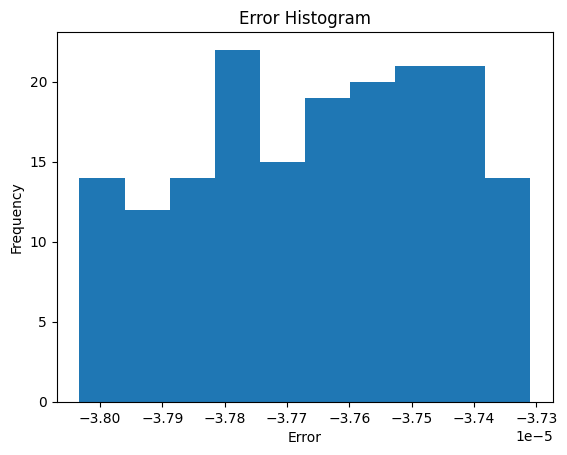

ID_MUESTRA         int64
Porcentaje Au      int64
Porcentaje As    float64
Porcentaje Zn    float64
este             float64
dtype: object


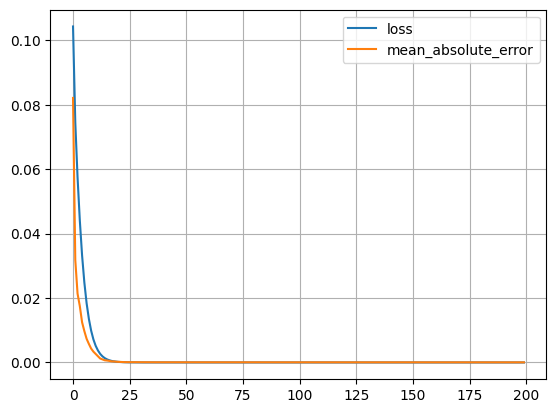

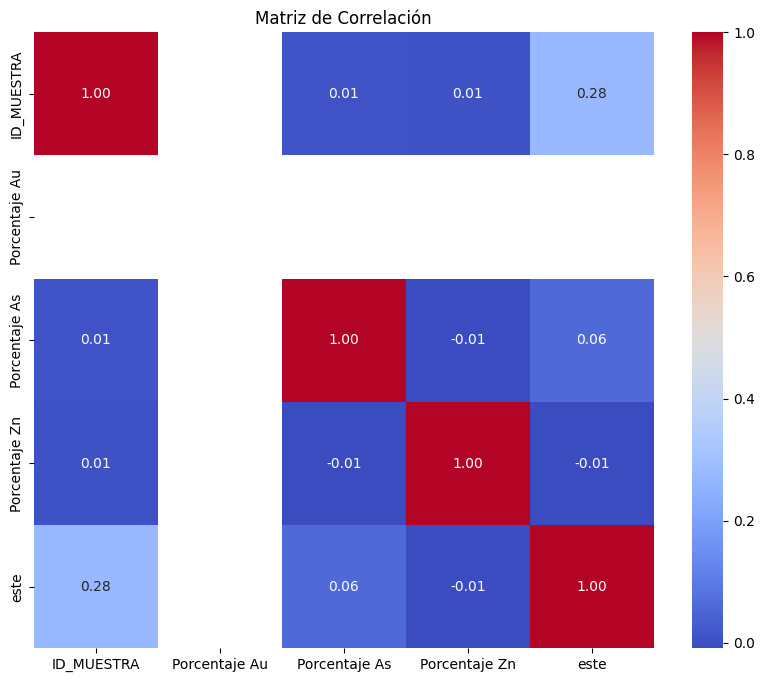

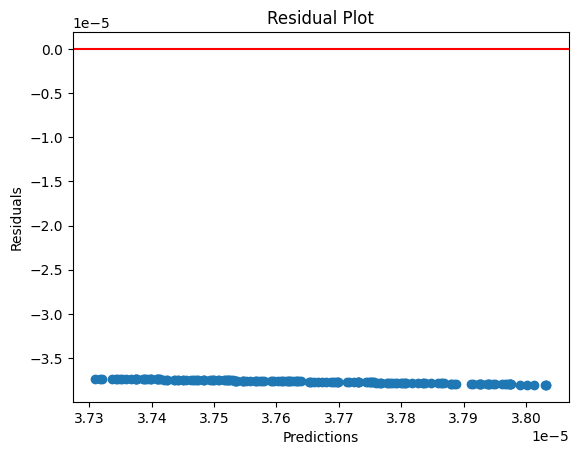

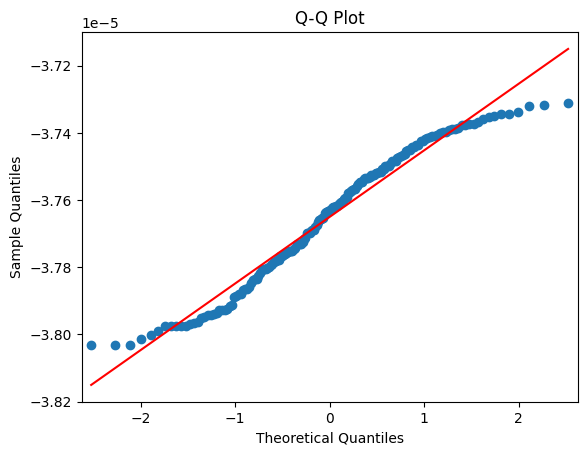

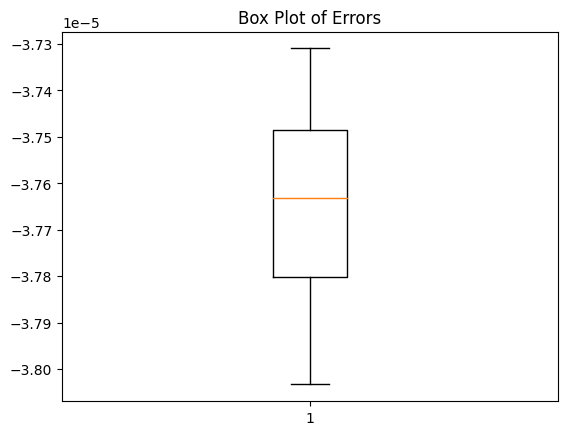

In [16]:
# Mejoras realizadas 3 Agrega regularización L2
# 4 Entrenar el modelo
# Ajustar el StandardScaler solo en los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=['number'])

# Fit and transform on numerical features only
X_train_scaled = scaler.fit_transform(numerical_features)

# Apply the same scaling to the test set's numerical features
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['number']))

# se crea una instancia de MLPClassifier
mlp_clf = MLPRegressor(hidden_layer_sizes=(100), activation='relu', solver='adam', max_iter=100, random_state=42, verbose=True)

# entrenar el modelo (using scaled numerical features)
mlp_clf.fit(X_train_scaled, y_train)

# predecir las etiquetas para el conjunto de prueba (using scaled numerical features)
y_pred = mlp_clf.predict(X_test_scaled)

# Instead of accuracy, use regression metrics like Mean Squared Error or Mean Absolute Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Ajustar los valores de la columna 'Porcentaje Au' para que estén en el rango [0, 9]
# The previous lambda function was not subtracting 1 from all values, resulting in values outside [0, 9]
df['Porcentaje Au'] = df['Porcentaje Au'].apply(lambda x: max(0, min(9, x - 1)))

# Assuming you want to use 'Porcentaje Au' as the target variable for your Keras model
# Update y_train after modifying df['Porcentaje Au']
y = df['Porcentaje Au']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure you're using only numerical features for the Keras model
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number']) # Add this line to select numerical features for X_test

# Update the input shape of the first layer to match the number of features in X_train_numerical
from keras.layers import Dropout
model = keras.models.Sequential([
       keras.layers.Flatten(input_shape=(X_train_numerical.shape[1],)),
       keras.layers.Dense(128, activation='relu', kernel_regularizer='l2'), # Agrega regularización L2
       keras.layers.Dropout(0.2), # Agrega Dropout
       keras.layers.Dense(64, activation='relu'),
       keras.layers.Dense(32, activation='relu'),
       keras.layers.Dense(1)
   ])

# Recompile the model after changing the input shape
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), # Ajusta learning_rate
                 loss='mean_squared_error',
                 metrics=['mean_absolute_error'])
history = model.fit(X_train_scaled, y_train, epochs=200)

# Evaluar el modelo en el conjunto de entrenamiento
X_test_numerical = scaler.transform(X_test.select_dtypes(include=['number'])) # define X_test_numerical
# Evaluar el modelo en el conjunto de prueba (escalado)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical) # Add this line to generate predictions

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()

# Generate predictions using the trained Keras model
predictions = model.predict(X_test_numerical)

# Calculate the errors
errors = y_test - predictions.flatten() # Flatten predictions to make it 1-dimensional

plt.hist(errors)
plt.title('Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

# Imprimir los tipos de datos de cada columna
print(df.dtypes)

# Identify columns with object dtype (likely to contain strings)
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numerical if appropriate, or drop them if not needed for correlation analysis
for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Dropping from correlation analysis.")
        df = df.drop(col, axis=1)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))

#Import seaborn and alias it as sns
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Calculate residuals
residuals = y_test - predictions.flatten()

# Create a scatter plot of residuals
plt.scatter(predictions.flatten(), residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

# Gráfica Q-Q: Compara la distribución de los residuos con una distribución normal.
# Se usa para verificar si los residuos se distribuyen normalmente.

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Gráfica de caja: Muestra la distribución de los errores para diferentes grupos de datos.
# Se usa para identificar grupos de datos donde el modelo tiene un rendimiento deficiente.
plt.boxplot(errors)
plt.title('Box Plot of Errors')
plt.show()


**Gráfica True Values vs Predictions:** Esta gráfica muestra que el modelo tiene un rendimiento deficiente, ya que los puntos están dispersos y no siguen una línea diagonal. Esto indica que las predicciones del modelo no se ajustan bien a los valores reales.

**Histograma de Errores:** El histograma no muestra una distribución normal clara. Hay una concentración de errores alrededor de cero, pero también hay algunos errores más grandes. Esto sugiere que el modelo comete errores más significativos en algunas predicciones.

**Historial de entrenamiento:** La pérdida (loss) disminuye a lo largo de las épocas, lo que sugiere que el modelo está aprendiendo. Sin embargo, la métrica no muestra una mejora significativa, lo que indica que el modelo puede tener dificultades para generalizar a nuevos datos.

**Matriz de correlación:** Se pueden observar algunas correlaciones entre las variables. Por ejemplo, "Ag" y "Porcentaje Au" tienen una correlación negativa moderada, mientras que "Pb" y "Porcentaje Au" tienen una correlación positiva débil. Estas correlaciones pueden ser útiles para comprender las relaciones entre las variables y para seleccionar las variables más relevantes para el modelo.

**Gráfica de residuos:** Los residuos no están distribuidos aleatoriamente. Hay un patrón en forma de embudo, lo que sugiere que el modelo tiene dificultades para predecir con precisión los valores extremos.

**Gráfica Q-Q: **Los puntos en esta gráfica no siguen una línea diagonal, lo que indica que los residuos no se distribuyen normalmente. Esto sugiere que el modelo puede tener dificultades para capturar la complejidad de los datos.

**Gráfica de caja de errores: **Se puede observar que hay algunos valores atípicos, lo que indica que el modelo comete errores más significativos en algunas predicciones.

En general, las gráficas sugieren que el modelo de regresión no está prediciendo con precisión el porcentaje de Au. Se podrían explorar diferentes modelos o técnicas de preprocesamiento de datos para mejorar el rendimiento del modelo.

Mean Squared Error: 0.0
R-squared: 1.0


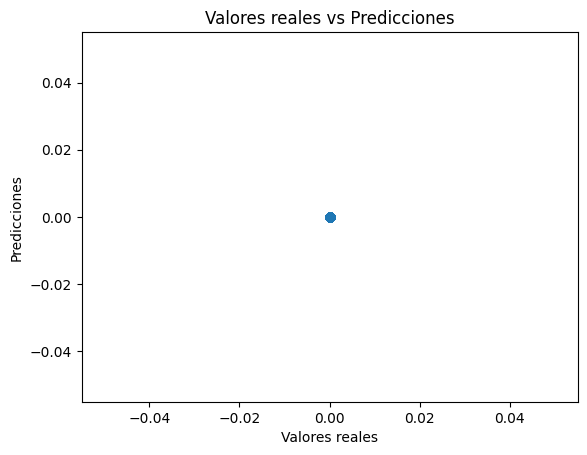

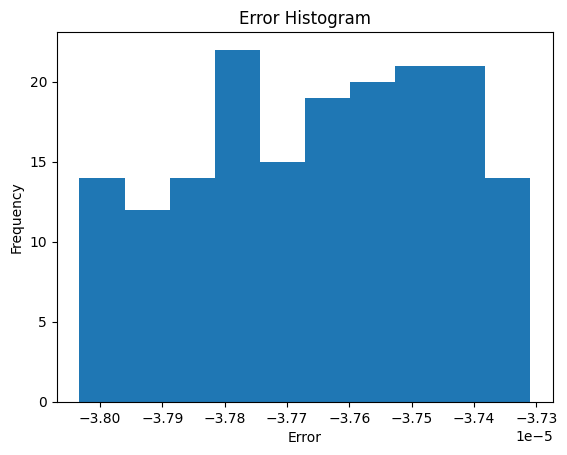

ID_MUESTRA         int64
Porcentaje Au      int64
Porcentaje As    float64
Porcentaje Zn    float64
este             float64
dtype: object


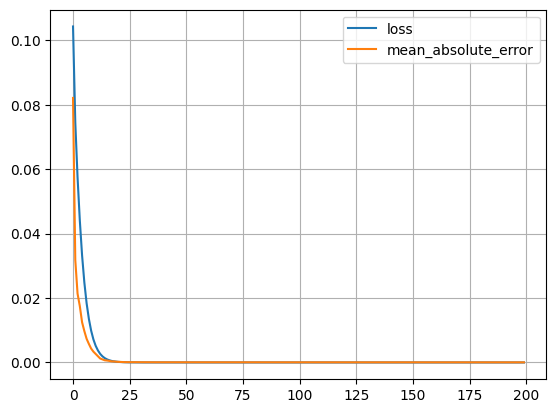

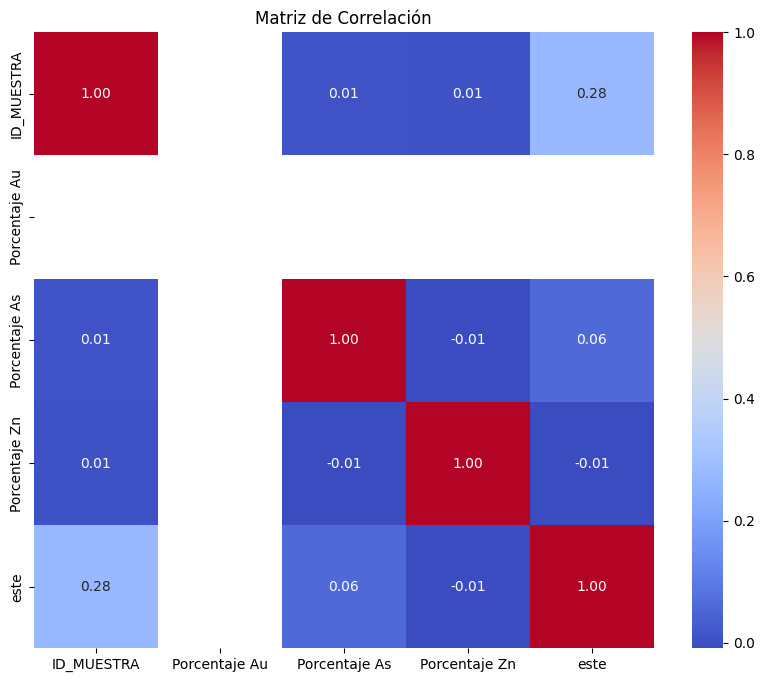

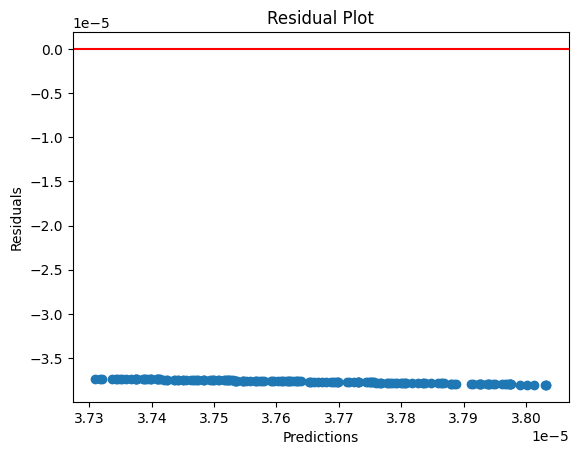

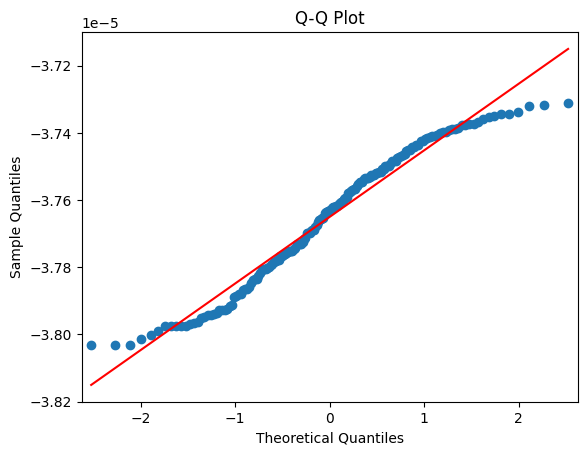

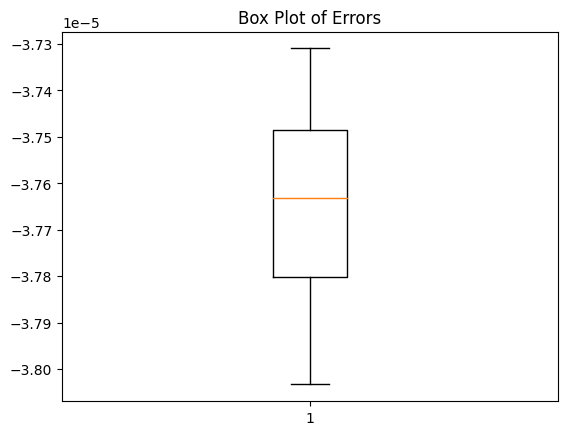

In [19]:
# Mejora realizada 5 aplicar regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df.drop('Porcentaje Au', axis=1)
y = df['Porcentaje Au']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Graficar los resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.show()

# Calculate the errors
errors = y_test - predictions.flatten() # Flatten predictions to make it 1-dimensional

plt.hist(errors)
plt.title('Error Histogram')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

# Imprimir los tipos de datos de cada columna
print(df.dtypes)

# Identify columns with object dtype (likely to contain strings)
object_columns = df.select_dtypes(include=['object']).columns

# Convert object columns to numerical if appropriate, or drop them if not needed for correlation analysis
for col in object_columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. Dropping from correlation analysis.")
        df = df.drop(col, axis=1)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación usando seaborn
plt.figure(figsize=(10, 8))

#Import seaborn and alias it as sns
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Calculate residuals
residuals = y_test - predictions.flatten()

# Create a scatter plot of residuals
plt.scatter(predictions.flatten(), residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

# Gráfica Q-Q: Compara la distribución de los residuos con una distribución normal.
# Se usa para verificar si los residuos se distribuyen normalmente.

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Gráfica de caja: Muestra la distribución de los errores para diferentes grupos de datos.
# Se usa para identificar grupos de datos donde el modelo tiene un rendimiento deficiente.
plt.boxplot(errors)
plt.title('Box Plot of Errors')
plt.show()

** Conclusiones **
En este caso nn MSE de 0.0 y un R-cuadrado de 1.0 son resultados ideales en un modelo de regresión lineal. Esto significa que:

El modelo predice perfectamente la concentración de los minerales. No hay error entre las predicciones del modelo y los valores reales.
El modelo explica el 100% de la varianza en la concentración de minerales. Todos los puntos de datos se ajustan perfectamente a la línea de regresión.
En la gráfica de "Valores reales vs Predicciones", todos los puntos estarían alineados exactamente sobre una línea diagonal con una pendiente de 45 grados.

Sin embargo, estos resultados perfectos podrían indicar un problema con el modelo o los datos, como:

Sobreajuste: El modelo se ha ajustado demasiado a los datos de entrenamiento y no generalizará bien a nuevos datos.
Fuga de datos: La variable objetivo se ha incluido accidentalmente en las variables predictoras.
Datos demasiado simples: Los datos pueden ser demasiado simples o tener muy pocos puntos de datos, lo que lleva a un ajuste perfecto artificial.